<a href="https://colab.research.google.com/github/sidarthsub/Political-Tweets-NLP-Project/blob/master/519Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Run before every model
```
# This is formatted as code
```



In [ ]:
import pandas as pd
import re
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import nltk
import pickle
import re
import numpy as np
import itertools
import matplotlib.pyplot as plt
import wordcloud
import torch
from torch.utils import data 
from torch.utils.data import Dataset, DataLoader, TensorDataset


nltk.download('stopwords')
nltk.download('punkt')
from sklearn import model_selection

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('ExtractedTweets.csv', header = 0, encoding='iso-8859-1')
political_train, political_test = model_selection.train_test_split(data, test_size=0.33, shuffle=True)

In [ ]:
class PreProcessTweet:

  def __init__(self):
    self.stopwords = set(stopwords.words('english') + list(punctuation) + list(['url','user','rt']))

  def processTweets(self, tweet, nlp= False):
    processedTweets=((self._processTweet(tweet[0], nlp = nlp), tweet[1]))
    return processedTweets

  def _processTweet(self, tweet, nlp= False):
    text = tweet.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL', text)
    text = re.sub('@[^\s]+','USER', text)
    text = text.lower().replace("ё", "е")
    text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
    text = re.sub(' +',' ', text)
    if nlp: 
      return text
    text = word_tokenize(text.strip())
    return [word for word in text if word not in self.stopwords]

#Model 1 : Naive Bayes


In [ ]:
political_train.drop(columns = ['Handle'], inplace = True)
political_test.drop(columns=['Handle'], inplace=True)
le = preprocessing.LabelEncoder()
political_train['Party'] = political_train['Party'].replace({'Democrat':0, 'Republican':1})
political_test['Party'] = political_test['Party'].replace({'Democrat':0, 'Republican':1})

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
preprocess = PreProcessTweet()
political_train['Tweet'] = list(zip(political_train['Tweet'], political_train['Party']))
political_train['Tweet'] = political_train['Tweet'].apply(lambda x: preprocess.processTweets(x))
political_test['Tweet'] = list(zip(political_test['Tweet'], political_test['Party']))
political_test['Tweet'] = political_test['Tweet'].apply(lambda x: preprocess.processTweets(x))
political_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Party,Tweet
8238,0,"([unacceptable, harmful, efforts, dismantle, v..."
30864,0,"([happy, kick, session, digitalization, energy..."
82074,1,"([always, pleasure, see, major, general, daryl..."
45403,1,"([honored, humbled, chosen, colleagues, serve,..."
65483,1,"([live, unveil, plan, lower, cost, prescriptio..."


In [ ]:
political_test.head()

,Party,Tweet
15578,0,"([chairman, gowdy, issue, subpoenas, compel, w..."
8527,0,"([family, american, value, trump, administrati..."
48255,1,"([loved, watching, wish, better, ending, great..."
65158,1,"([look, forward, congratulating, year, southje..."
35853,0,"([exhorto, mis, colegas, votar, favor, de, est..."


In [ ]:
def buildVocabulary(preprocessedTrainingData):
    all_words = []
    
    for (words, sentiment) in preprocessedTrainingData:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    
    return word_features

def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
def getFreq(preprocessedTrainingData, sent = 0):
    all_words = []
    
    for (words, sentiment) in preprocessedTrainingData:
        if (sentiment == sent):
          all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    return wordlist

In [ ]:
preprocessedTrainingData = list(political_train['Tweet'])
word_features = buildVocabulary(preprocessedTrainingData)
print(word_features)
trainingFeatures = nltk.classify.apply_features(extract_features, preprocessedTrainingData)

dict_keys(['unacceptable', 'harmful', 'efforts', 'dismantle', 'va', 'inside', 'amp', 'outside', 'chil', 'happy', 'kick', 'session', 'digitalization', 'energy', 'infrastructure', 'summit', 'diversityintechn', 'always', 'pleasure', 'see', 'major', 'general', 'daryl', 'bohac', 'captain', 'doug', 'carlson', 'nebraska', 'national', 'guard', 'honored', 'humbled', 'chosen', 'colleagues', 'serve', 'anxious', 'get', 'work', 'live', 'unveil', 'plan', 'lower', 'cost', 'prescription', 'drugs', 'click', 'link', 'tune', 'passover', 'time', 'commemorate', 'liberation', 'story', 'jewish', 'people', 'slavery', 'egypt', 'symbolica', 'maintaining', 'nation', 'global', 'primacy', 'high', 'performance', 'computing', 'critical', 'ever', 'today', 'hosted', 'member', 'roundtable', 'discuss', 'impact', 'section', '232', 'tariffs', 'dead', 'living', 'must', 'bear', 'witness', 'elie', 'wiesel', 'holocaustremembranceday', 'stream', 'cha', 'hearing', 'preventing', 'sexual', 'harrassment', 'congressional', 'workpla

In [ ]:
# train classifier
NBayesClassifier = nltk.NaiveBayesClassifier.train(trainingFeatures)

In [ ]:
load_pickle_file = open('my_classifier.pickle', 'rb')
loaded_model = pickle.load(load_pickle_file)

In [ ]:
# get validation accuracy
NBResultLabels = [loaded_model.classify(extract_features(tweet[0])) for tweet in political_test['Tweet'][:100]]


In [ ]:
newList = [political_test['Party'].iloc[i] == NBResultLabels[i] for i in range(len(NBResultLabels))]
print(np.sum(newList)/len(newList))

0.81


In [ ]:
# most informative features
p = re.compile('contains\((.+?)\)')
most_infrom = [p.match(x[0]).group(1) for x in loaded_model.most_informative_features(n=1000)]
print(most_infrom)
z=loaded_model._feature_probdist
print(type(z))
print(dict(itertools.islice(z.items(), 1000)))

['taxcutsandjobsact', 'netneutrality', 'taxreform', 'equalpayday', 'gender', 'impeachment', 'discrimination', 'hook', 'wealthy', 'fosta', 'corporations', 'graham', 'color', 'bottled', 'optimism', 'bonuses', 'abetterdeal', 'billy', 'diversity', 'utah', 'delaware', 'renewal', 'donors', 'lord', 'maxine', 'lgbt', 'pruitt', 'chairwoman', 'threatened', 'rotunda', 'idaho', 'hoosier', 'este', 'convenes', 'suppress', 'memphis', 'gut', 'paychecks', 'equal', 'promesa', 'glri', 'climatechange', 'census', 'angeles', 'utility', 'marchforourlives', 'lgbtq', 'counterparts', 'earners', 'hyper', 'polls', 'ley', 'hawaii', 'asset', 'reforming', 'nationalwalkoutday', 'hampshire', 'hiv', 'massacre', 'lobbyists', 'interfere', 'planet', 'nra', 'cohen', 'permitting', 'christ', 'male', 'goptaxplan', 'inequality', 'giuliani', 'silent', 'code', 'applauds', 'hourly', 'texan', 'jay', 'nunesmemo', 'equity', 'slash', 'earthday', 'subenvironment', 'capable', 'tulsi', 'gabbard', 'racial', 'acti', 'shou', 'secrecy', 'di

In [ ]:
# test on some new tweets -> Obama vs Trump??
filearray = ['PoliticalTweetsTest.csv', 'ObamaTweets.csv', 'WarrenTweets.csv', 'CuomoTweets.csv', 'PelosiTweets.csv', 'TrumpTweets.csv', 'PompeoTweets.csv', 'RomneyTweets.csv', 'GrahamTweets.csv', 'McConnellTweets.csv']
writearray = ['TweetResultsNB.csv', 'TweetResultsObamaNB.csv', 'TweetResultsWarrenNB.csv', 'TweetResultsCuomoNB.csv', 'TweetResultsPelosiNB.csv', 'TweetResultsTrumpNB.csv', 'TweetResultsPompeoNB.csv', 'TweetResultsRomneyNB.csv', 'TweetResultsGrahamNB.csv', 'TweetResultsMconnellNB.csv']
for i in range(len(filearray)):
  tweets = pd.read_csv(filearray[i], encoding='iso-8859-1')
  tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
  tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = False))
  tocheck = tweets['Tweet']
  outputs = [loaded_model.classify(extract_features(tweet[0])) for tweet in tweets['Tweet']]
  tweets['Predicted'] = outputs
  tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
  tweets.to_csv(writearray[i])

In [ ]:
def get_most_informative_features(model, n=10, isdem = 0):
        # Determine the most relevant features, and display them.
        cpdist = model._feature_probdist
        print("Most Informative Features")

        tuplelist = []
        for (fname, fval) in model.most_informative_features(n):

            def labelprob(l):
                return cpdist[l, fname].prob(fval)

            labels = sorted(
                [l for l in model._labels if fval in cpdist[l, fname].samples()],
                key=lambda element: (-labelprob(element), element),
                reverse=True
            )
            if len(labels) == 1:
                continue
            l0 = labels[0]
            l1 = labels[-1]
            if cpdist[l0, fname].prob(fval) == 0:
                ratio = "INF"
            else:
                ratio = cpdist[l1, fname].prob(fval) / cpdist[l0, fname].prob(fval)
                
            p = re.compile('contains\((.+?)\)')
            tuplelist.append((p.match(fname).group(1), ratio))
        return tuplelist

In [ ]:
most_inform_freq = get_most_informative_features(loaded_model, n = 10000)

print(most_inform_freq)

Most Informative Features
[('taxcutsandjobsact', 169.67436517533253), ('taxreform', 61.476219266424835), ('equalpayday', 48.9891327509056), ('netneutrality', 44.05497549541871), ('fosta', 38.777307537283356), ('gender', 38.415938632005115), ('lgbtq', 37.711059024078416), ('corporations', 36.7040881556117), ('bonuses', 35.68200139240042), ('discrimination', 34.468612827615594), ('impeachment', 34.18666098444491), ('onthisday', 32.4720542791885), ('idaho', 31.21100362756953), ('promesa', 30.66226294481142), ('color', 28.97055188578734), ('graham', 27.427851672712613), ('diversity', 26.432985297251225), ('filters', 25.728105689324526), ('nra', 25.58712976773918), ('fy18ndaa', 24.905750369474678), ('delaware', 23.472490943959087), ('transgender', 23.04956317920307), ('threatened', 22.20370764969103), ('socialsecurity', 22.20370764969103), ('pruitt', 22.111766831265808), ('lgbt', 21.498828041764327), ('racial', 21.498828041764327), ('para', 20.995342607530972), ('racist', 20.79394843383763)

In [ ]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", width = 600, height = 400).generate_from_frequencies(dict(most_inform_freq))
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
preprocessedTestData = list(political_train['Tweet'])

demFrequencylist = getFreq(preprocessedTestData, sent = 0)
repFrequencylist = getFreq(preprocessedTestData, sent = 1)
print(demFrequencylist)

<FreqDist with 25456 samples and 288623 outcomes>


In [ ]:
cloud = wordcloud.WordCloud(max_font_size=50, max_words=250, background_color="white", width = 600, height = 400, stopwords=set(['url', 'user', 'rt'])).generate_from_frequencies(repFrequencylist)
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#Model 2: Cos-Similarity on tfidf


In [ ]:
political_train, political_test = model_selection.train_test_split(data, test_size=0.33, shuffle=True)
political_train.drop(columns = ['Handle'], inplace = True)
political_test.drop(columns=['Handle'], inplace=True)
le = preprocessing.LabelEncoder()
political_train['Party'] = political_train['Party'].replace({'Democrat':0, 'Republican':1})
political_test['Party'] = political_test['Party'].replace({'Democrat':0, 'Republican':1})
preprocess = PreProcessTweet()
political_train['Tweet'] = list(zip(political_train['Tweet'], political_train['Party']))
political_train['Tweet'] = political_train['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
political_test['Tweet'] = list(zip(political_test['Tweet'], political_test['Party']))
political_test['Tweet'] = political_test['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
political_train.head()
test = [z[0] for z in np.asarray(political_test['Tweet'])] #need to get all the democratic and republican appended
#together to make one vector
rep = [z[0] for z in np.asarray(political_train['Tweet']) if z[1] == 1]
str_rep = ""
for i in range(len(rep)):
   str_rep = str_rep + " " + rep[i]

dem = [z[0] for z in np.asarray(political_train['Tweet']) if z[1] == 0]
str_dem = ""
for i in range(len(dem)):
   str_dem = str_dem + " " + dem[i]
x = [str_dem, str_rep]   


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
len(test)

28532

##Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words= 'english')
political_train_vector = vectorizer.fit_transform(x)
vectorizer.get_feature_names() #all the words should be features


['11',
 '111',
 '1111',
 '11143',
 '1115waiver',
 '1119',
 '112',
 '112th',
 '113',
 '1133',
 '1135',
 '113th',
 '113thcongress',
 '114',
 '114k',
 '114th',
 '114thcongress',
 '115',
 '115congress',
 '115th',
 '115thcongress',
 '116',
 '1161',
 '116365',
 '117',
 '1171',
 '117b',
 '117th',
 '118',
 '1182',
 '1182more',
 '119',
 '1199ers',
 '11a',
 '11am',
 '11amet',
 '11k',
 '11pm',
 '11pmet',
 '11th',
 '12',
 '121',
 '1215',
 '122',
 '1227',
 '123',
 '1238',
 '124',
 '125',
 '125b',
 '126',
 '1267',
 '127',
 '1273',
 '1276',
 '12775',
 '128',
 '129',
 '12am',
 '12b',
 '12carrieract',
 '12firstalert',
 '12k',
 '12p',
 '12pm',
 '12th',
 '12thman',
 '13',
 '131',
 '1313',
 '131st',
 '132',
 '1322',
 '133',
 '133rd',
 '134',
 '135',
 '1358',
 '136',
 '137',
 '138',
 '139',
 '13k',
 '13novembre2',
 '13rh',
 '13th',
 '13thamendment',
 '14',
 '141',
 '142',
 '1426',
 '1429',
 '143',
 '144',
 '145',
 '145pm',
 '146',
 '147',
 '14719',
 '1474',
 '14743',
 '1475',
 '148',
 '1486',
 '149',
 '149

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(political_train_vector)


In [ ]:
pd_tf = pd.DataFrame.sparse.from_spmatrix(tfidf)
pd_tf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,36155,36156,36157,36158,36159,36160,36161,36162,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172,36173,36174,36175,36176,36177,36178,36179,36180,36181,36182,36183,36184,36185,36186,36187,36188,36189,36190,36191,36192,36193,36194
0,0.004018,0.000127,0.000000,0.000000,0.000000,0.000000,0.000506,0.000000,0.000063,0.000000,0.000000,0.000000,0.000000,0.000032,0.000054,0.000063,0.000032,0.000095,0.000000,0.000221,0.000054,0.000032,0.000000,0.000000,0.000095,0.000000,0.000000,0.000000,0.000107,0.000000,0.000000,0.000054,0.000107,0.000000,0.000253,0.000054,0.000000,0.000063,0.000054,0.000475,...,0.000054,0.000054,0.000063,0.000214,0.000054,0.000000,0.000054,0.000054,0.000054,0.000000,0.000161,0.000107,0.000253,0.000158,0.000000,0.000000,0.000000,0.000107,0.000589,0.000054,0.000000,0.000054,0.000000,0.000054,0.000000,0.002309,0.000000,0.000054,0.000054,0.000000,0.000000,0.000054,0.000054,0.000054,0.000000,0.000054,0.000000,0.000000,0.000107,0.000054
1,0.005395,0.000228,0.000097,0.000048,0.000048,0.000048,0.000086,0.000048,0.000143,0.000048,0.000048,0.000097,0.000048,0.000086,0.000000,0.000143,0.000029,0.000285,0.000048,0.000343,0.000000,0.000057,0.000048,0.000048,0.000057,0.000048,0.000048,0.000048,0.000000,0.000048,0.000242,0.000000,0.000000,0.000048,0.000400,0.000000,0.000048,0.000057,0.000000,0.000485,...,0.000000,0.000000,0.000029,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000048,0.000000,0.000000,0.000228,0.000771,0.000097,0.000048,0.000048,0.000000,0.000000,0.000000,0.000048,0.000000,0.000097,0.000000,0.000048,0.002027,0.000628,0.000000,0.000000,0.000048,0.000048,0.000000,0.000000,0.000000,0.000145,0.000000,0.000048,0.000048,0.000000,0.000000


In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
political_test_vector = vectorizer.transform(test)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_test = transformer.transform(political_test_vector)
tfidf_test



<28532x36195 sparse matrix of type '<class 'numpy.float64'>'
	with 292013 stored elements in Compressed Sparse Row format>

In [ ]:
sim = sklearn.metrics.pairwise.cosine_similarity(tfidf_test, Y=tfidf, dense_output=True)
prediction = [np.argmax(z) for z in sim]

In [ ]:
newList = [political_test['Party'].iloc[i] == prediction[i] for i in range(len(prediction))]
print(np.sum(newList)/len(newList))

0.6103322585167531


In [ ]:
filearray = ['PoliticalTweetsTest.csv', 'ObamaTweets.csv', 'WarrenTweets.csv', 'CuomoTweets.csv', 'PelosiTweets.csv', 'TrumpTweets.csv', 'PompeoTweets.csv', 'RomneyTweets.csv', 'GrahamTweets.csv', 'McConnellTweets.csv']
writearray = ['TweetResultsCos.csv', 'TweetResultsObamaCos.csv', 'TweetResultsWarrenCos.csv', 'TweetResultsCuomoCos.csv', 'TweetResultsPelosiCos.csv', 'TweetResultsTrumpCos.csv', 'TweetResultsPompeoCos.csv', 'TweetResultsRomneyCos.csv', 'TweetResultsGrahamCos.csv', 'TweetResultsMconnellCos.csv']
for i in range(len(filearray)):
  device = torch.device("cuda")
  tweets = pd.read_csv(filearray[i], encoding='iso-8859-1')
  tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
  tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
  tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
  tweet_vector = vectorizer.transform(tocheck)
  tfidf_tweet = transformer.transform(tweet_vector)
  tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
  tfif_tweet_tensor = tfif_tweet_tensor.to(device)
  sim = sklearn.metrics.pairwise.cosine_similarity(tfif_tweet_tensor.cpu().numpy(), Y=tfidf, dense_output=True)
  outputs = [np.argmax(z) for z in sim]
  tweets['Predicted'] = outputs
  tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
  tweets.to_csv(writearray[i])

#Model 3: Neural Network on tfidf



In [ ]:
political_train, political_test = model_selection.train_test_split(data, test_size=0.33, shuffle=True)
political_train.drop(columns = ['Handle'], inplace = True)
political_test.drop(columns=['Handle'], inplace=True)
le = preprocessing.LabelEncoder()
political_train['Party'] = political_train['Party'].replace({'Democrat':0, 'Republican':1})
political_test['Party'] = political_test['Party'].replace({'Democrat':0, 'Republican':1})
preprocess = PreProcessTweet()
political_train['Tweet'] = list(zip(political_train['Tweet'], political_train['Party']))
political_train['Tweet'] = political_train['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
political_test['Tweet'] = list(zip(political_test['Tweet'], political_test['Party']))
political_test['Tweet'] = political_test['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
political_train.head()
train = [z[0] for z in np.asarray(political_train['Tweet'])] 
labels = [z[1] for z in np.asarray(political_train['Tweet'])]


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words= 'english', max_features = 30000)
political_train_vector = vectorizer.fit_transform(train)
vectorizer.get_feature_names() #all the words should be features


from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(political_train_vector)



In [ ]:
test = [z[0] for z in np.asarray(political_test['Tweet'])]
test_labels = [z[1] for z in np.asarray(political_test['Tweet'])]
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
political_test_vector = vectorizer.transform(test)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_test = transformer.transform(political_test_vector)
tfidf_test



<28532x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 290516 stored elements in Compressed Sparse Row format>

In [ ]:
new_labels = np.reshape(labels, (len(labels),1))
print(new_labels.shape)

import torch
dense_tensor = torch.Tensor(tfidf.todense())


(57928, 1)


In [ ]:
import torch.utils.data as data
from torch.utils.data import TensorDataset

dataset = data.TensorDataset(dense_tensor, torch.LongTensor(labels)) 
dataloader = data.DataLoader(dataset, batch_size = 500, num_workers = 0, shuffle = True) # create your dataloader


In [ ]:
import torch.nn as nn
class NLPNetwork(nn.Module):
 
    def __init__(self):
        """
        Your code here
        """
        super(NLPNetwork, self).__init__()

        self.nlp_net = torch.nn.Sequential(
            torch.nn.Linear(in_features=(30000), out_features=5000, bias = True),
            torch.nn.ReLU(),
            torch.nn.Dropout(inplace= True), 
            torch.nn.Linear(in_features=(5000), out_features = 5000),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=(5000), out_features = 5000),
            torch.nn.ReLU(),
            torch.nn.Dropout(inplace= True), 
            torch.nn.Linear(in_features=(5000), out_features = 500),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=(500), out_features = 2),
        )      

    
    def forward(self, x):  
        forward_pass = self.nlp_net(x)
        return forward_pass


In [ ]:
def train_model (args):
  args.model.train()
  loss = args.loss
  device = args.device
  cumulative_loss = 0
  currentloss = 0
  for batch_idx, (data, target) in enumerate(args.train_loader):
          target = target
          data, target = data.to(device), target.to(device)
          args.optimizer.zero_grad()
          output = args.model (data)
          curr_loss = loss.forward(nn.functional.log_softmax(output), target)
          curr_loss.backward()
          cumulative_loss += curr_loss.item()
          currentloss += curr_loss.item()
          args.trainlabels.append(output)
          args.traintargets.append(target)
          args.optimizer.step()
          if (batch_idx+1) % 50 == 0:
            args.cumulativeloss.append(currentloss/50)
            currentloss = 0
  print(cumulative_loss/500)
  
  return args.model

In [ ]:

def train_full(args):
    args.device = torch.device("cuda")
    args.model = args.model.to(args.device)
    args.loss = nn.NLLLoss()
    args.train_loader = dataloader
    args.optimizer = torch.optim.Adam(params=args.model.parameters(), lr= args.learning_rate) #momentum=args.momentum)
    args.cumulativeloss = []
    args.trainlabels= []
    args.traintargets = []
    args.accuracy = []
    for epoch in range(args.num_epochs):
        print("~~~~~~~~~~~~~~`CURRENT EPOCH~~~~~~~~~~~~~~~~~~`")
        print(epoch)
        train_model(args)      
    return args

def get_args():
  class Args(object):
    pass
  args = Args();
  args.learning_rate = 0.001
  args.model = NLPNetwork()
  args.num_epochs = 3
  return args
args = train_full(get_args())



~~~~~~~~~~~~~~`CURRENT EPOCH~~~~~~~~~~~~~~~~~~`
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


0.1229149831533432
~~~~~~~~~~~~~~`CURRENT EPOCH~~~~~~~~~~~~~~~~~~`
1
0.07264092594385146
~~~~~~~~~~~~~~`CURRENT EPOCH~~~~~~~~~~~~~~~~~~`
2
0.026138271510601045


In [ ]:
test_model(args, tfidf_test, test_labels)

In [ ]:
def test_model(args, data, labels):
    data = torch.Tensor(data.todense())
    device = torch.device("cuda")
    args.model = args.model.to(device)
    model = args.model
    model.eval()
    data = data.to(device)
    logit = model(data)
    prediction = torch.argmax((logit), dim = 1)
    predictions = prediction.cpu()
    predictions = predictions.numpy()
    print(predictions)
    print(labels)
    newList = [labels[i] == predictions[i] for i in range(len(predictions))]
    print(np.sum(newList)/len(newList))


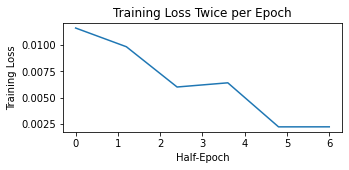

In [ ]:
args.accuracy = [0.4828963970278985, 0.734999299032665, 0.7596383008551801, 0.7625122669283612, 0.7624071218281228, 0.7700126174120286, 0.7682601990747231, 0.7686106827421842, 0.7721155194167951]
plt.figure(figsize = (5,2))
plt.plot(np.linspace(0, len([z/50 for z in args.cumulativeloss]), len([z/50 for z in args.cumulativeloss])), [z/50 for z in args.cumulativeloss])
#plt.plot(np.linspace(0, len(args.accuracy)*2, len(args.accuracy)), args.accuracy)
plt.xlabel('Half-Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Twice per Epoch')
plt.show()

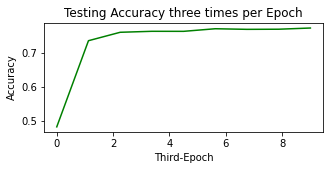

In [ ]:
plt.figure(figsize = (5,2))
plt.plot(np.linspace(0, len(args.accuracy), len(args.accuracy)), args.accuracy, color = 'g')
plt.xlabel('Third-Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy three times per Epoch')
plt.show()

In [ ]:
# general prediction on all selected political tweets
device = torch.device("cuda")
tweets = pd.read_csv('PoliticalTweetsTest.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsNN.csv')

In [ ]:
# prediction on Obama tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('ObamaTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsObamaNN.csv')

In [ ]:
# prediction on Warren tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('WarrenTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsWarrenNN.csv')

In [ ]:
# prediction on Cuomo tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('CuomoTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsCuomoNN.csv')

In [ ]:
# prediction on Pelosi tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('PelosiTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsPelosiNN.csv')

In [ ]:
# prediction on Trump tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('TrumpTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsTrumpNN.csv')

In [ ]:
# prediction on Pompeo tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('PompeoTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsPompeoNN.csv')

In [ ]:
# prediction on Romney tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('RomneyTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsRomneyNN.csv')

In [ ]:
# prediction on Graham tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('GrahamTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsGrahamNN.csv')

In [ ]:
# prediction on McConnell tweets alone
device = torch.device("cuda")
tweets = pd.read_csv('McConnellTweets.csv', encoding='iso-8859-1')
tweets['Tweet'] = list(zip(tweets['Tweet'], tweets['Party']))
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: preprocess.processTweets(x, nlp = True))
tocheck = [z[0] for z in np.asarray(tweets['Tweet'])]
tweet_vector = vectorizer.transform(tocheck)
tfidf_tweet = transformer.transform(tweet_vector)
tfif_tweet_tensor = torch.Tensor(tfidf_tweet.todense())
tfif_tweet_tensor = tfif_tweet_tensor.to(device)
outputs = torch.argmax(args.model(tfif_tweet_tensor), dim=1).cpu().numpy()
tweets['Predicted'] = outputs
tweets['Predicted'] = tweets['Predicted'].apply(lambda x: 'Democrat' if x ==0 else 'Republican')
tweets.to_csv('TweetResultsMcConnellNN.csv')